In [1]:
import numpy as np
X = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
Y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

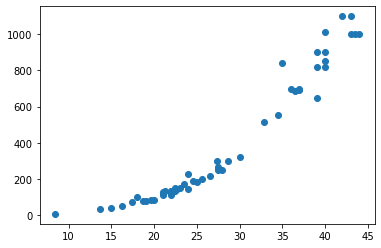

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y= train_test_split(X,Y,random_state=43)
print(t_x.shape,tt_x.shape)

(42,) (14,)


In [4]:
t_x

array([34.5, 39. , 43. , 16.2, 39. , 19.6, 22. , 36. , 19. , 40. , 30. ,
       22.5, 26.5, 32.8, 20. , 42. , 25.6, 21. , 27.5, 24. , 21. , 44. ,
       37. , 40. , 37. , 28. , 13.7, 24. , 21. , 28.7, 43.5, 23.5, 27.3,
       39. , 15. , 25. , 22. , 22. , 22.7, 40. ,  8.4, 17.4])

In [5]:
n_t_x=t_x.reshape(-1,1)
n_tt_x=tt_x.reshape(-1,1)
print(n_t_x.shape,n_tt_x.shape)

(42, 1) (14, 1)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(n_t_x,t_y)

KNeighborsRegressor()

In [7]:
knr.score(n_tt_x,tt_y)

0.9662464614810213

오차란(차이점)정답-결과

머신 러닝 Y=WX -학습->정답 =W입력<br><br>
->y=W(학습되어서 값을 갖고 있다.)x<br><br>
y=wx <-입력

In [8]:
from sklearn.metrics import mean_absolute_error
end_tt_y=knr.predict(n_tt_x)#모델(학습된)입력을 준다.

mae=mean_absolute_error(tt_y,end_tt_y) #평균절대값오차
print(mae)

29.69285714285715


In [9]:
knr.score(n_tt_x,tt_y)

0.9662464614810213

모델변경전 트레이닝data로 점수확인

In [10]:
knr.score(n_t_x,t_y)

0.9815010309553626

In [11]:
knr.n_neighbors=3 #선별 개수 k의기본값이 5개인데 이를 3개로 설정 
knr.fit(n_t_x,t_y)
knr.score(n_tt_x,tt_y)

0.9625437594582437

모델변경후 트레이닝data로 점수확인

In [12]:
knr.score(n_t_x,t_y)

0.9878266455621827

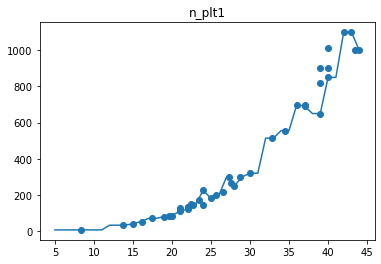

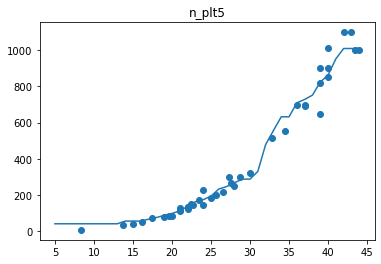

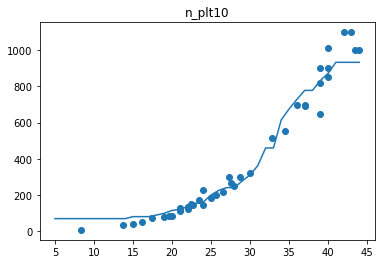

In [13]:
knr1=KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1) #비교를 위한 data생성
for n in[1,5,10]:
    knr1.n_neighbors=n
    knr1.fit(n_t_x,t_y)
    p_data=knr1.predict(x)
    plt.scatter(n_t_x,t_y)
    plt.plot(x,p_data)
    plt.title(f'n_plt{n}')
    plt.show()


K회귀의 한계

In [14]:
knr2=KNeighborsRegressor(n_neighbors=3)
knr2.fit(n_t_x,t_y)
knr2.predict([[50]]) #저장된 값을 벗어난 값


array([1033.33333333])

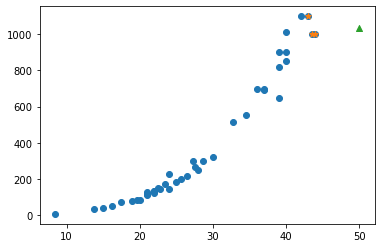

In [15]:
d,i=knr2.kneighbors([[50]])
plt.scatter(n_t_x,t_y)
plt.scatter(n_t_x[i],t_y[i],marker='*')
plt.scatter(50,1033.3,marker='^')

In [16]:
knr2.predict([[1000]]) #저장된 값을 훨씬벗어난 값인데 결과 값이 동일하다 (문제점)

array([1033.33333333])

선형회귀

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(n_t_x,t_y)

In [18]:
print(lr.predict([[50]])) #선을 그으면서 위 문제점을 보안
print(lr.predict([[1000]]))

[1187.92199858]
[35638.66987063]


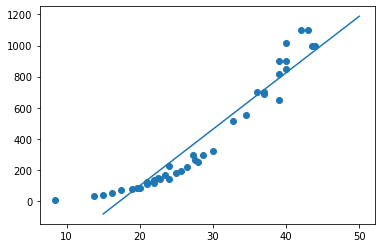

In [19]:
plt.scatter(n_t_x,t_y)
#1차 방정식을 만들어 내는것 -> 선형회귀했다
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

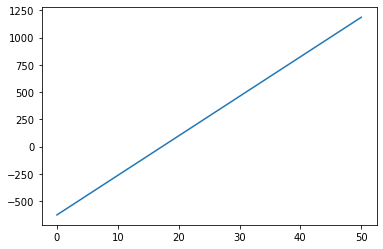

In [20]:
plt.plot([0,50],[0*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_]) #lr.coef_:계수, lr.intercept_:절편값

In [21]:
p_t_x=np.column_stack((n_t_x**2,n_t_x))
p_tt_x=np.column_stack((n_tt_x**2,n_tt_x))
p_t_x.shape

(42, 2)

In [22]:
lr = LinearRegression()
lr.fit(p_t_x,t_y)
print(lr.predict([[50**2,50]]))

[1573.06792794]


In [23]:
print(lr.coef_,lr.intercept_) #[w2 w1] w0

[  1.05682431 -24.53340579] 157.67745303390137


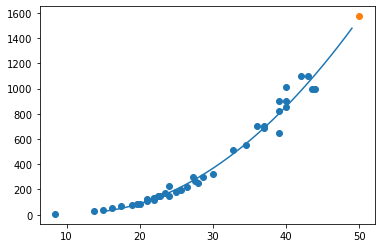

In [24]:
p=np.arange(15,50)
plt.scatter(n_t_x,t_y)
plt.plot(p,1.05*p**2 -24.5*p +157.67)
plt.scatter([50],[1573.06])